In [10]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from scripts.manipulation import remove_acentos
from scripts.manipulation import normalize_cols
from scripts import scrap_data
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml


# LOAD and SAVE DATA from WORDMETERS

In [11]:
new_data, df_final = scrap_data.load_data()

In [12]:
new_data.sort_values(by='Confirmed', ascending=False).head(30).reset_index(drop=True)

,Date_last_updated_AEDT,date,countryname,Confirmed,Deaths,Recovered
0,8/09/2020 23:34,2020-08-09,0,20023019,733976,12897815
1,8/09/2020 23:34,2020-08-09,World,20023019,733976,12897815
2,8/09/2020 23:34,2020-08-09,US,5199444,165617,2664701
3,8/09/2020 23:34,2020-08-09,Brazil,3035582,101136,2118460
4,8/09/2020 23:34,2020-08-09,India,2214137,44466,1534278
5,8/09/2020 23:34,2020-08-09,Russia,887536,14931,693422
6,8/09/2020 23:34,2020-08-09,South Africa,559859,10408,411474
7,8/09/2020 23:34,2020-08-09,Mexico,480278,52298,322465
8,8/09/2020 23:34,2020-08-09,Peru,478024,21072,324020
9,8/09/2020 23:34,2020-08-09,Colombia,387481,12842,212688


In [13]:
df_wordmeters = io.load_total_table()
df_wordmeters = manipulation.create_all_country_total_data(df_wordmeters, vars = ['confirmed','deaths','recovered','active'])


In [14]:
df_wordmeters.sort_values(by='confirmed', ascending=False).reset_index(drop=True)['countrycode'].unique()

array(['US', 'BR', 'IN', 'RU', 'ZA', 'MX', 'PE', 'CO', 'CL', 'ES', 'IR',
       'UK', 'SA', 'PK', 'BD', 'IT', 'AR', 'TR', 'DE', 'FR', 'IQ', 'PH',
       'ID', 'CA', 'QA', 'KZ', 'EG', 'EC', 'BO', 'CN', 'IL', 'SE', 'OM',
       'UA', 'DO', 'PA', 'BE', 'KW', 'BY', 'AE', 'RO', 'NL', 'GT', 'SG',
       'PT', 'PL', 'JP', 'HN', 'NG', 'BH', 'GH', 'AM', 'KG', 'AF', 'CH',
       'DZ', 'AZ', 'MA', 'UZ', 'RS', 'MD', 'IE', 'KE', 'VE', 'CR', 'NP',
       'ET', 'AT', 'AU', 'SV', 'CM', 'CI', 'KR', 'DK', 'PS', 'BA', 'BG',
       'SD', 'SN', 'NO', 'MY', 'ZM', 'GN', 'GA', 'FI', 'LU', 'PY', 'MR',
       'LB', 'AL', 'GR', 'HR', 'DJ', 'MV', 'GQ', 'HU', 'NI', 'CG', 'ME',
       'TH', 'SO', 'CU', 'LK', 'SK', 'SR', 'LT', 'SI', 'EE', 'RW', 'IS',
       'BJ', 'TN', 'NZ', 'UY', 'LV', 'JO', 'CY', 'LR', 'GM', 'GE', 'BF',
       'NE', 'MT', 'TG', 'JM', 'AD', 'TD', 'BS', 'VN', 'SM', 'GY', 'TZ',
       'TW', 'MN', 'TT', 'KH', 'BB', 'BN', 'MC', 'SC', 'BT', 'AG', 'LI',
       'FJ', 'LC', 'VA'], dtype=object)

## European Centre for Disease Prevention and Contro

https://data.europa.eu/euodp/en/data/dataset/covid-19-coronazvirus-data

In [15]:
# df_eucenter = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
# dd = manipulation.manipulate_eucenter(df_eucenter)

### Generate Graphs for Multiple Countrys

In [16]:
df = df_wordmeters.copy()

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']
mask_countrys = df['countrycode'].isin(codes)

In [17]:
from scripts import vis_layout
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)

themes = themes['all_countrys']
for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.all_countrys(df[mask_countrys], var, scale, themes, save=False)
        
#         plot(fig, filename=f"../images/multipleCountry/{var}_{scale}.html", auto_open=False)
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/multipleCountry/{var}_{scale}.html", auto_open=False)


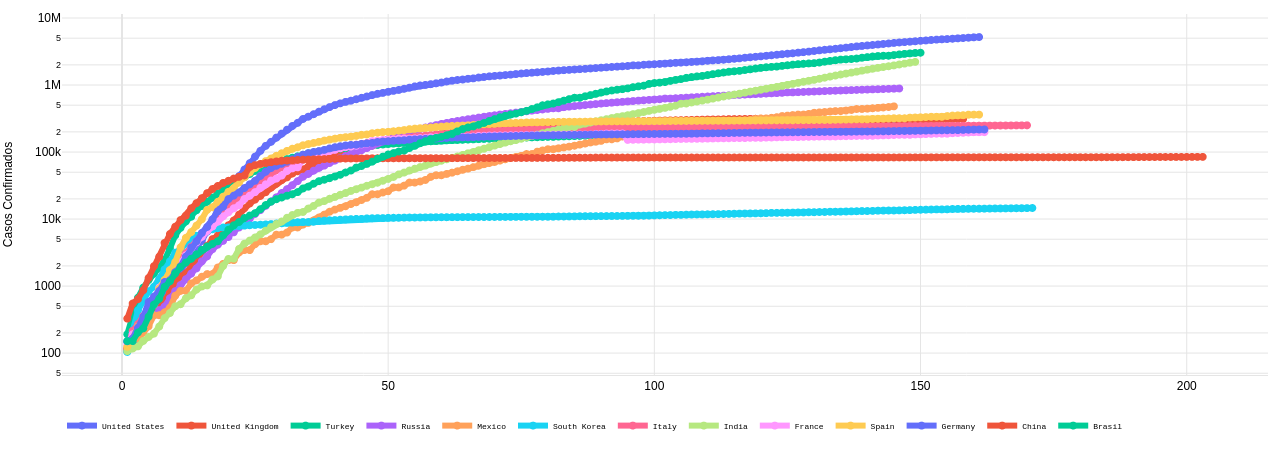

In [18]:
fig

## By Country

In [19]:
df = df_wordmeters.copy()

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_daily']

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']

# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_daily.html", auto_open=False)


themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_cum']
# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_cum.html", auto_open=False)


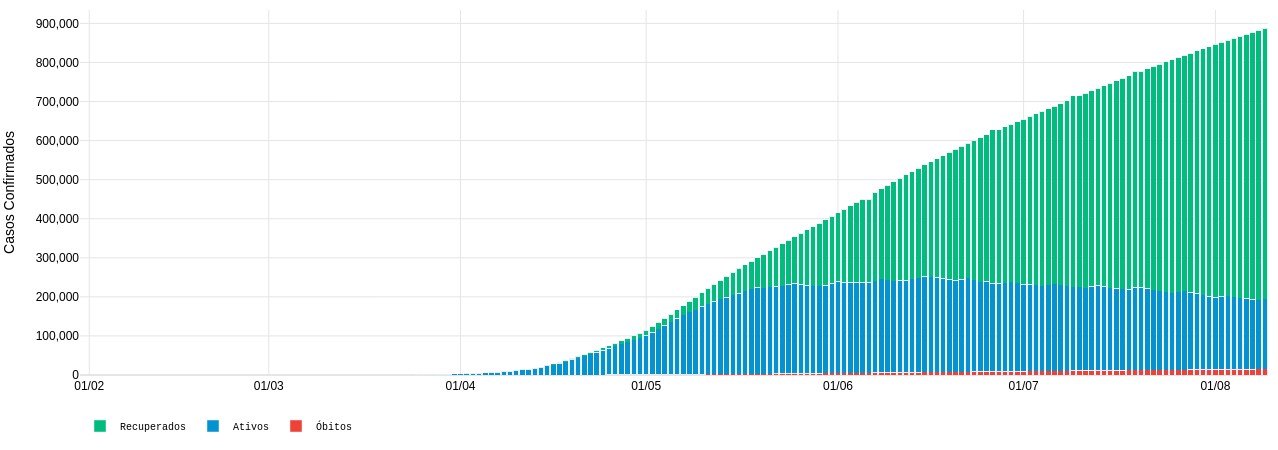

In [20]:
fig

## Estados

In [21]:
from scripts.io import read_sheets
from scripts import manipulation
config = yaml.load(open('../configs/config.yaml', 'r'), Loader=yaml.FullLoader)

io.update_ms_data()
print('io done!')

df = pd.read_csv("../data/ministerio_da_saude/last_data_ms_covid19.csv")

df_states = manipulation.manipule_mytable(df,config['ms_table'])

print("States table, Done!")

[WDM] - Getting latest mozilla release info for v0.27.0
[WDM] - Trying to download new driver from https://github.com/mozilla/geckodriver/releases/download/v0.27.0/geckodriver-v0.27.0-linux64.tar.gz
[WDM] - Driver has been saved in cache [/home/m/.wdm/drivers/geckodriver/linux64/v0.27.0]


downloaded
renamed
83.11705183982849
7.086244583129883
saved
io done!
States table, Done!


## Multiple

In [22]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cumulative']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(df_states, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/cumulative/{var}_{scale}.html", auto_open=False)


## Diario

In [23]:
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_daily']

codes = df_states['state'].unique()

for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_daily.html", auto_open=False)
    
    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cum']


for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_cum.html", auto_open=False)

## Cidades

In [24]:
from scripts import io

!rm '../data/brIO/caso_full.csv'

!cd '../data/brIO/'
!wget 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz' -P ../data/brIO/
!gunzip '../data/brIO/caso_full.csv.gz'


brio, brio_raw = io.load_brasilIO()

print("Br.IO table, Done!")

--2020-08-09 23:36:49--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 104.26.9.175, 104.26.8.175, 172.67.71.45, ...
Connecting to data.brasil.io (data.brasil.io)|104.26.9.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13401705 (13M) [application/gzip]
Saving to: ‘../data/brIO/caso_full.csv.gz’

caso_full.csv.gz    100%[===================>]  12,78M  4,11MB/s    in 3,1s    

2020-08-09 23:36:53 (4,11 MB/s) - ‘../data/brIO/caso_full.csv.gz’ saved [13401705/13401705]

Br.IO table, Done!


In [25]:
### Load Cities
cities = io.load_cities(brio_raw)

In [26]:
cities.tail()

,date,city,confirmed,new_confirmed,deaths,new_deaths
412,2020-06-24,São José dos Campos,2462.0,97.0,84.0,2.0
413,2020-06-25,São José dos Campos,2561.0,99.0,86.0,2.0
414,2020-06-26,São José dos Campos,2750.0,189.0,87.0,1.0
415,2020-06-27,São José dos Campos,2763.0,13.0,87.0,0.0
416,2020-06-28,São José dos Campos,2763.0,0.0,87.0,0.0


## Multiple Cities

In [27]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(cities, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/cumulative/{var}_{scale}.html", auto_open=False)


## Diario


In [28]:
import unidecode

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_daily']

codes = ['São Paulo', 'Taubaté', 'São José dos Campos']

for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_daily.html", auto_open=False)

    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_cum']
for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_cum.html", auto_open=False)
    print(unidecode.unidecode(state.replace(' ','_').lower()))

sao_paulo
taubate
sao_jose_dos_campos


### Figures to UP

In [21]:
# from scripts import io

# f1_name = 'total_lin.html'
# f2_name = 'mortes_lin.html'
# f3_name = 'brasil_lin_total.html'
# f4_name = 'brasil_lin_mortes.html'
# # f5_name = "brasil_por_estado_confirmed.html"
# # f6_name = "brasil_por_estado_deaths.html"

# f1_path = f"../images/multipleCountry/{f1_name}"
# f2_path = f"../images/multipleCountry/{f2_name}"
# f3_path = f"../images/singleCountry/{f3_name}"
# f4_path = f"../images/singleCountry/{f4_name}"
# # f5_path = f"../images/brasil/{f5_name}"
# # f6_path = f"../images/brasil/{f6_name}"

# names_paths = {f1_name:f1_path,
#          f2_name:f2_path,
#          f3_name:f3_path,
#          f4_name:f4_path
#               }
# #          f5_name:f5_path,
# #          f6_name:f6_path}

# for name in names_paths.keys():
    
#     io.to_storage(bucket='sv-covid19',
#               bucket_folder='brasil',
#               file_name=name,
#               path_to_file=names_paths[name])